##### Predicting Survival of Passengers of the titanic ship

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

`PassengerId`: Unique identifier for each passenger.

`Survived`: Indicates whether the passenger survived (1) or not (0).

`Pclass`: Ticket class of the passenger (1 = 1st class, 2 = 2nd class, 3 = 3rd class).

`Name`: Name of the passenger.

`Sex:` Gender of the passenger.

`Age:` Age of the passenger. Can be fractional if the age is estimated.

`SibSp:`: Number of siblings/spouses aboard the Titanic.

`Parch:`: Number of parents/children aboard the Titanic.

`Ticket:`: Ticket number.

`Fare:`: Passenger fare.

`Cabin:`: Cabin number.

`Embarked:` Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.shape

(891, 12)

In [8]:
df.drop(['PassengerId', 'Cabin'], inplace=True, axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [10]:
df[df['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [11]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [13]:
df[df['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [14]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
df['Embarked'] = df['Embarked'].fillna('S')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [22]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
df[df['Age'] == 0.42]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
803,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C


In [132]:
df.drop(803, axis=0, inplace=True)

In [133]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,0.383146,2.307865,29.394101,0.523596,0.380899,32.230823
std,0.486427,0.836220,12.990763,1.103224,0.806243,49.715015
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.903100
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [139]:
df[df['Age'] < 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
831,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


In [140]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,0.383146,2.307865,29.394101,0.523596,0.380899,32.230823
std,0.486427,0.836220,12.990763,1.103224,0.806243,49.715015
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.903100
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Do we need to scale the features?

#### Feature Selection

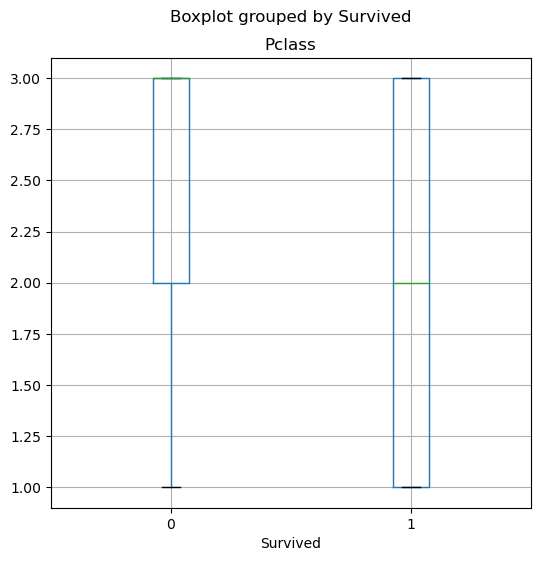

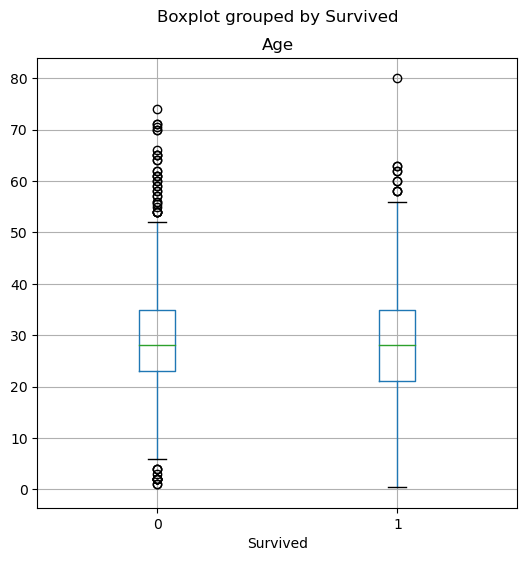

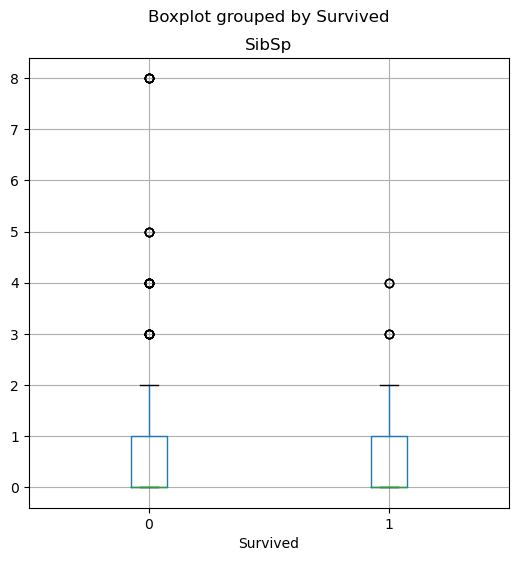

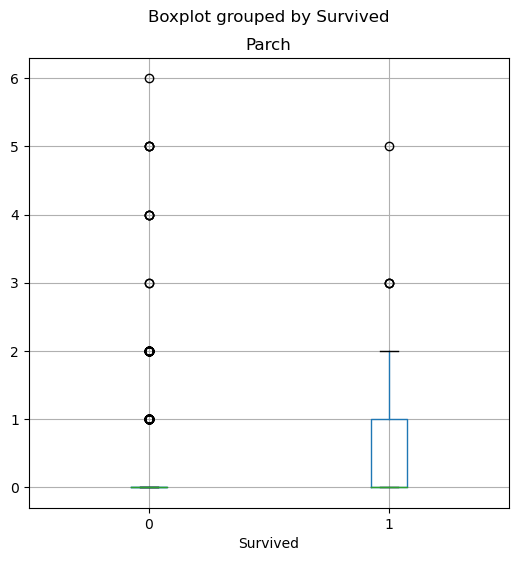

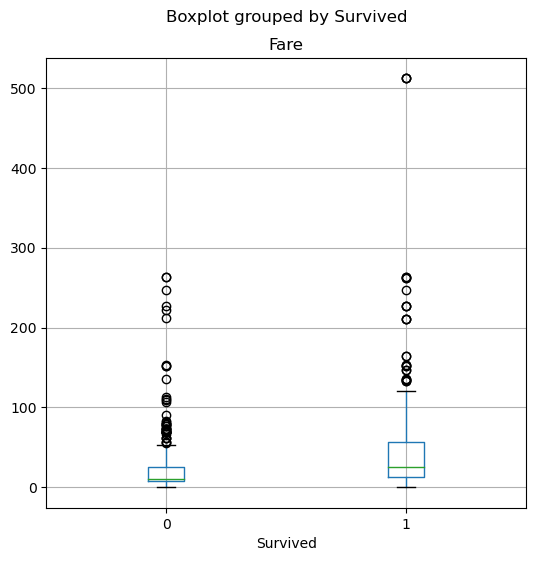

In [86]:
num_features = ['Pclass', 'Age', 'SibSp','Parch', 'Fare']
for col in num_features:
    sb.countplot()
    plt.title(col)
plt.show()

#### Parch and Pclass show marked difference in distribution for survived class than for passengers that didn't survived. Age can also be considered.

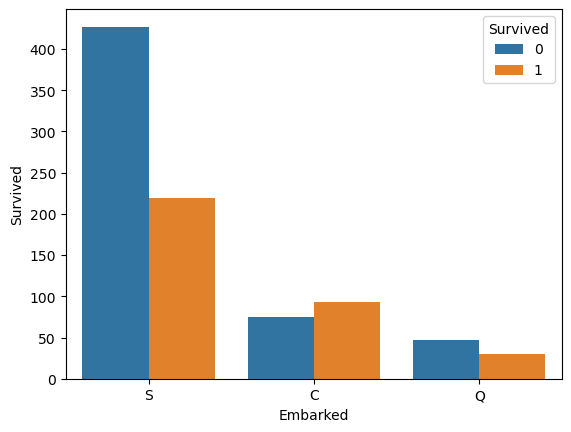

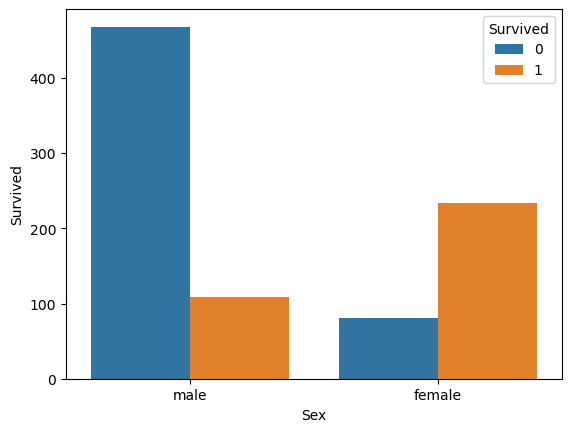

In [105]:
cat_features = ['Embarked', 'Sex']

for col in cat_features:
    sb.barplot(x=col, y='Survived', data=df, estimator=len, hue='Survived')
    plt.show()

##### It's not clear how this variables impact the chances of survival so we use both

In [107]:
X = df[['Age','Parch','Pclass' ,'Embarked', 'Sex']]
y = df['Survived']

In [108]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

##### This is a classical case of a binary classification. There seem to be some degree of class imbalance as well

In [109]:
X.head()

,Age,Parch,Pclass,Embarked,Sex
0,22.0,0,3,S,male
1,38.0,0,1,C,female
2,26.0,0,3,S,female
3,35.0,0,1,S,female
4,35.0,0,3,S,male


In [110]:
X['Embarked'] = X['Embarked'].replace({'S':0, 'C':1, 'Q':2})

C:\Users\aaginam\AppData\Local\Temp\ipykernel_37764\2802148924.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Embarked'] = X['Embarked'].replace({'S':0, 'C':1, 'Q':2})
C:\Users\aaginam\AppData\Local\Temp\ipykernel_37764\2802148924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].replace({'S':0, 'C':1, 'Q':2})


In [111]:
X['Sex'] = X['Sex'].replace({'male':0, 'female':1})

C:\Users\aaginam\AppData\Local\Temp\ipykernel_37764\3221991356.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Sex'] = X['Sex'].replace({'male':0, 'female':1})
C:\Users\aaginam\AppData\Local\Temp\ipykernel_37764\3221991356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].replace({'male':0, 'female':1})


In [112]:
X.head()

,Age,Parch,Pclass,Embarked,Sex
0,22.0,0,3,0,0
1,38.0,0,1,1,1
2,26.0,0,3,0,1
3,35.0,0,1,0,1
4,35.0,0,3,0,0


In [113]:
X['Embarked'].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [114]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#### Model building

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [116]:
model = LogisticRegression().fit(X_train, y_train)

In [117]:
prediction = model.predict(X_test)

##### Model evaluation

In [118]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, prediction))

Accuracy:  0.7985074626865671


In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       167
           1       0.74      0.71      0.73       101

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



The classification report includes the following metrics for each class (0 and 1):

* *Precision*: Of the predictions the model made for this class, what proportion were correct?
* *Recall*: Out of all of the instances of this class in the test dataset, how many did the model identify?
* *F1-Score*: An average metric that takes both precision and recall into account.
* *Support*: How many instances of this class are there in the test dataset?


The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class.

The precision and recall answer the following questions:

precision : `of all the passengers the model predicted to have survived, how many actually survived`

recall : `of all the passengers that actually survived, how many did the model identify`

The precision and recall metrics are derived from four possible prediction outcomes:
* *True Positives*: The predicted label and the actual label are both 1.
* *False Positives*: The predicted label is 1, but the actual label is 0.
* *False Negatives*: The predicted label is 0, but the actual label is 1.
* *True Negatives*: The predicted label and the actual label are both 0.

These metrics are generally tabulated for the test set and shown together as a *confusion matrix*, which takes the following form:

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

Note that the correct (*true*) predictions form a diagonal line from top left to bottom right - these figures should be significantly higher than the *false* predictions if the model is any good.

In Python, you can use the **sklearn.metrics.confusion_matrix** function to find these values for a trained classifier:

**When to use Accuracy Metric**  
When there are roughly equal number of samples belonging to each class.  
<br>
**When to use Precision**  
Precision is a good measure to determine, when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.  
<br>
**When to use Recall**  
For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.  
<br>
**When to use F1 Score**  
F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

In [120]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, prediction)
print (cm)

[[142  25]
 [ 29  72]]


<Axes: >

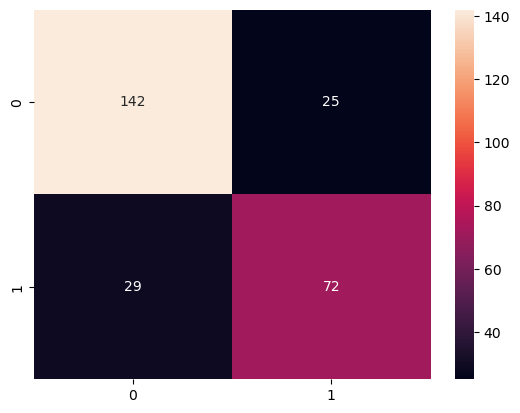

In [124]:
sb.heatmap(cm, annot=True, fmt='.0f')

### Using a scaled feature, let's confirm if this impacts performance

In [125]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.56573646, -0.47367361,  0.82737724, -0.56883712, -0.73769513],
       [ 0.66386103, -0.47367361, -1.56610693,  1.00518113,  1.35557354],
       [-0.25833709, -0.47367361,  0.82737724, -0.56883712,  1.35557354],
       ...,
       [-0.1046374 ,  2.00893337,  0.82737724, -0.56883712,  1.35557354],
       [-0.25833709, -0.47367361, -1.56610693,  1.00518113, -0.73769513],
       [ 0.20276197, -0.47367361,  0.82737724,  2.57919938, -0.73769513]])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
model_scaled_X = LogisticRegression().fit(X_train, y_train)

In [127]:
prediction = model_scaled_X.predict(X_test)

In [128]:
print('Accuracy: ', accuracy_score(y_test, prediction))

Accuracy:  0.7835820895522388


In [129]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       163
           1       0.75      0.68      0.71       105

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



Is it possible we didn't use the right scaling approach